# TEMP_loom_load

In [1]:
# Libraries

# For loading the loom file.
import anndata
import loompy
#import scanpy

# Floor.
import math

# Histograms.
import matplotlib.pyplot as plt

In [2]:
# Load the data.
cells = anndata.io.read_loom(
    "/media/aeneas/Samsung_T5/transfer/mayur/loom/BMP-1ST2.loom"
)

/home/aeneas/miniconda3/envs/3d_rna_velocity/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
cells

AnnData object with n_obs × n_vars = 13234 × 61860
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

TODO: See which genes have isoforms...?

Get the gene lengths.

In [4]:
cells.var

,Accession,Chromosome,End,Start,Strand
Gene,,,,,
WASH7P,ENSG00000227232,1,29570,14404,-
MIR6859-1,ENSG00000278267,1,17436,17369,-
FAM138A,ENSG00000237613,1,36081,34554,-
ENSG00000238009,ENSG00000238009,1,133723,89295,-
ENSG00000239945,ENSG00000239945,1,91105,89551,-
...,...,...,...,...,...
ANKRD36P1,ENSG00000188399,Y,26420535,26409815,+
ENSG00000277146,ENSG00000277146,Y,26454092,26453982,+
TPTE2P4,ENSG00000215506,Y,26579690,26508213,+


# CHECK

In [7]:
# Get (cell number, gene index) of spliced, unspliced, and ambiguous genes.

# Spliced genes.
spliced = []

# Row and column indices.
nonzeros = cells.layers['spliced'].nonzero()

row_indices = list(nonzeros[0])
column_indices = list(nonzeros[1])

for i in range(len(row_indices)):
    spliced.append((row_indices[i], column_indices[i]))

# Unspliced genes.
unspliced = []

# Row and column indices.
nonzeros = cells.layers['unspliced'].nonzero()

row_indices = list(nonzeros[0])
column_indices = list(nonzeros[1])
#print(row_indices)

for i in range(len(row_indices)):
    unspliced.append((row_indices[i], column_indices[i]))

# Ambiguous genes.
ambiguous = []

# Row and column indices.
nonzeros = cells.layers['ambiguous'].nonzero()

row_indices = list(nonzeros[0])
column_indices = list(nonzeros[1])
#print(row_indices)

for i in range(len(row_indices)):
    ambiguous.append((row_indices[i], column_indices[i]))

In [8]:
print(len(set(spliced)) == len(spliced))
print(len(set(unspliced)) == len(unspliced))
print(len(set(ambiguous)) == len(ambiguous))

True
True
True


Make sure no overlap between the different categories?

In [ ]:
# Overlaps?
#spliced_unspliced = set.intersection(set(spliced), set(unspliced))
#spliced_ambiguous = set.intersection(set(spliced), set(ambiguous))
#unspliced_ambiguous = set.intersection(set(unspliced), set(ambiguous))

#print(len(spliced_unspliced))
#print(len(spliced_ambiguous))
#print(len(unspliced_ambiguous))
#print(len(set.intersection(spliced_unspliced, unspliced_ambiguous)))

# METRIC

We want to see if the probability of an unspliced molecule depends on the gene length (see Gorin G, Pachter L. Length Biases in Single-Cell RNA Sequencing of pre-mRNA. bioRxiv: 2021.07.30.454514; 2021.)

We begin by finding all expressed gene lengths (our "population").

In [9]:
# Gene population indices.
gene_population_indices = []

# Get the index of any expressed gene.
for j in [i[1] for i in unspliced]:
    gene_population_indices.append(j)

for j in [i[1] for i in spliced]:
    gene_population_indices.append(j)

for j in [i[1] for i in ambiguous]:
    gene_population_indices.append(j)

# Now get the lengths.
gene_population_lengths = []

for j in gene_population_indices:
    gene_population_lengths.append(gene_lengths[j])

NameError: name 'gene_lengths' is not defined

# METRIC

### We can consider how related the reads are to the gene length/number of isoforms.  If we see a reasonable trend relating the gene length to the splicing state, then we may have confounding (paper source...)

Get the spliced genes lengths.

In [40]:
# Spliced gene lengths.
spliced_gene_lengths = []

for j in [i[1] for i in spliced]:
    spliced_gene_lengths.append(gene_lengths[j])

Create bins for gene lengths, then see how many spliced genes are seen at a given gene length.

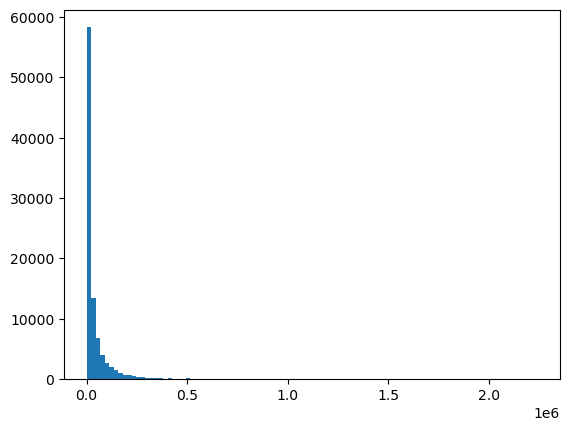

In [41]:
# Gene length bins.
min_gene_length = min(spliced_gene_lengths)
max_gene_length = max(spliced_gene_lengths)

# range(min_gene_length, max_gene_length, math.floor((max_gene_length-min_gene_length)/100))

plt.hist(
    spliced_gene_lengths,
    bins = list(range(min_gene_length, max_gene_length, math.floor((max_gene_length-min_gene_length)/100)))
)
plt.show()

In [ ]:
We can estimate the probability of success at each bin size